# Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-3, 4))
plt.yticks(range(-3, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

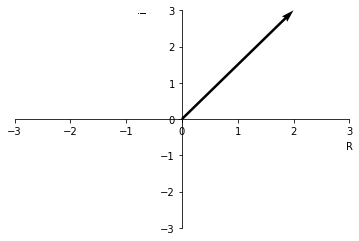

In [14]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt

def plot_complex_number(z):
    plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
    
    plt.xticks(range(-3, 4))
    plt.yticks(range(-3, 4))
    plt.xlabel("R")
    plt.ylabel("i")
    
    ax = plt.gca()
    ax.xaxis.set_label_coords(1, 0.4)
    ax.yaxis.set_label_coords(0.4, 1)
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    pass

plot_complex_number(2 + 3j)

How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

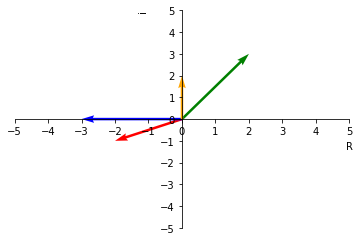

In [44]:
def plot_complex_numbers(numbers, colors):
    for key, number in enumerate(numbers):
        plt.quiver(0, 0, number.real, number.imag, color = colors[key], angles = "xy", scale_units = "xy", scale = 1)
        
    plt.xticks(range(-5, 6))
    plt.yticks(range(-5, 6))
    plt.xlabel("R")
    plt.ylabel("i")
    
    ax = plt.gca()
    ax.xaxis.set_label_coords(1, 0.4)
    ax.yaxis.set_label_coords(0.4, 1)
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()
    pass
plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's see what the operations look like. Let's add two numbers and plot the result.

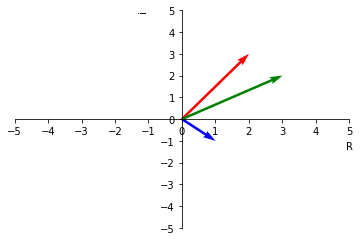

In [32]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

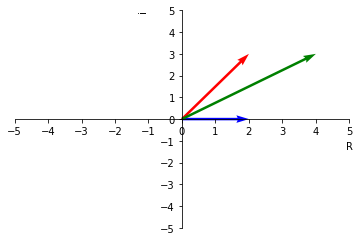

In [33]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

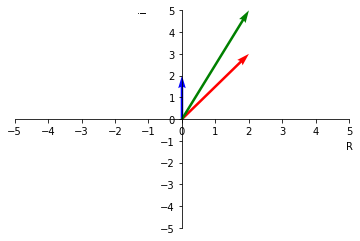

In [34]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

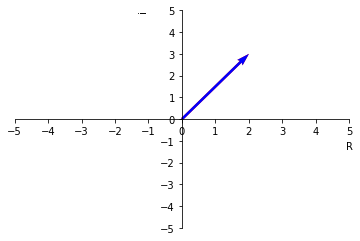

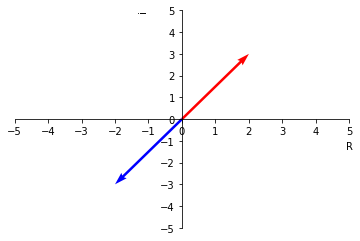

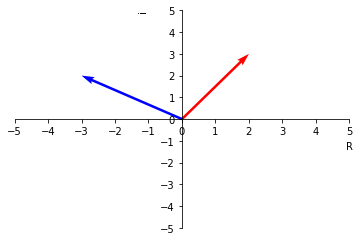

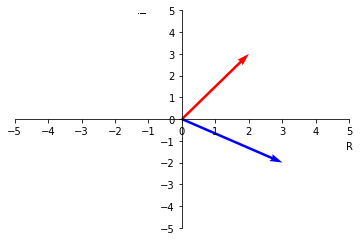

In [37]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"])
plot_complex_numbers([z, z * -1], ["red", "blue"])
plot_complex_numbers([z, z * 1j], ["red", "blue"])
plot_complex_numbers([z, z * -1j], ["red", "blue"])

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

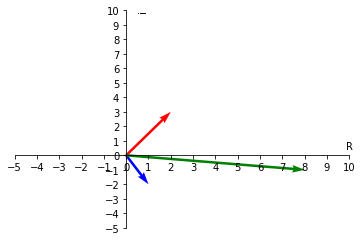

In [43]:
z1 = 2 + 3j
z2 = 1 - 2j
# (2 + 3j) * (1 - 2j) = 2 - 4j + 3j + 6 = 8 - 1j

plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])   